# Dogs vs Cats Simple ConvNet 

CNN solution entry to Dogs vs Cats Kaggle competiton. Challenge was to correctly classify dataset containing images of dogs and cats.

In [153]:
import os, cv2, random
import numpy as np
import pandas as pd
from tqdm import tqdm  

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPool2D, Dense, Activation, BatchNormalization
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

In [154]:
TRAIN_DIR = 'D:/Documents/AI/all/train/train/'
TEST_DIR = 'D:/Documents/AI/all/test/test/'

ROWS = 64
COLS = 64
CHANNELS = 3

train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]
test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]

# slice datasets for memory efficiency on Kaggle Kernels, delete if using full dataset
#train_images = train_dogs[:5000] + train_cats[:5000] 
random.shuffle(train_images)
#test_images =  test_images[:1000]

def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)


def prep_data(images):
    count = len(images)
    data = np.ndarray((count, ROWS, COLS, CHANNELS), dtype=np.uint8)

    #The enumerate() function takes a collection (e.g. a tuple) and returns it as an enumerate object.
    #The enumerate() function adds a counter as the key of the enumerate object ie [0,D:/Documents/AI/all/train/train/dog.0.jpg]
    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image
        if i%250 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

train = prep_data(train_images)
test = prep_data(test_images)

print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))

Processed 0 of 25000
Processed 250 of 25000
Processed 500 of 25000
Processed 750 of 25000
Processed 1000 of 25000
Processed 1250 of 25000
Processed 1500 of 25000
Processed 1750 of 25000
Processed 2000 of 25000
Processed 2250 of 25000
Processed 2500 of 25000
Processed 2750 of 25000
Processed 3000 of 25000
Processed 3250 of 25000
Processed 3500 of 25000
Processed 3750 of 25000
Processed 4000 of 25000
Processed 4250 of 25000
Processed 4500 of 25000
Processed 4750 of 25000
Processed 5000 of 25000
Processed 5250 of 25000
Processed 5500 of 25000
Processed 5750 of 25000
Processed 6000 of 25000
Processed 6250 of 25000
Processed 6500 of 25000
Processed 6750 of 25000
Processed 7000 of 25000
Processed 7250 of 25000
Processed 7500 of 25000
Processed 7750 of 25000
Processed 8000 of 25000
Processed 8250 of 25000
Processed 8500 of 25000
Processed 8750 of 25000
Processed 9000 of 25000
Processed 9250 of 25000
Processed 9500 of 25000
Processed 9750 of 25000
Processed 10000 of 25000
Processed 10250 of 25

Text(0.5,1,'Train - Cats and Dogs')

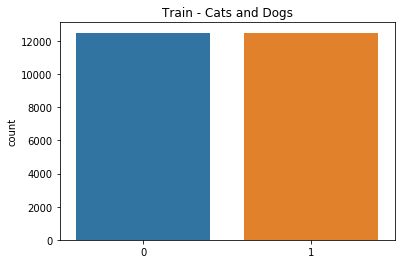

In [155]:
#Generating the Labels
#We're dealing with a binary classification problem here - (1) dog (0) cat. 
#The lables can be created by looping over the file names in the train directory. 
#It's nice to see the training data is perfectly balanced.

labels = []
labels2 = []

for i in train_images:
    if 'dog' in i:
        labels.append(1)
    else:
        labels.append(0)
                   
sns.countplot(labels)
plt.title('Train - Cats and Dogs')


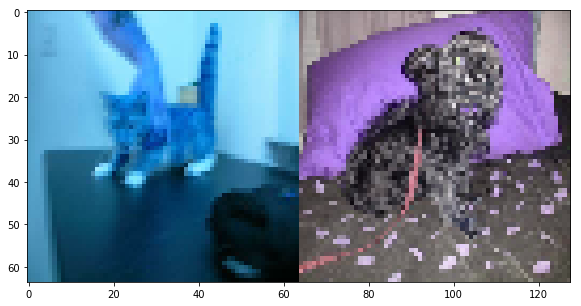

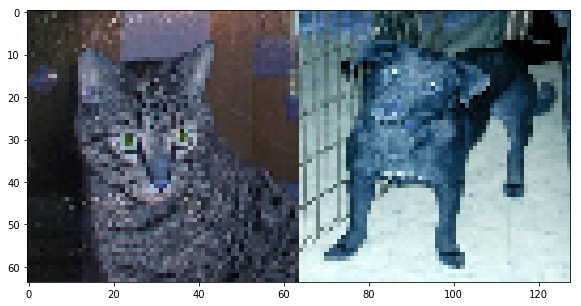

In [156]:
def show_cats_and_dogs(idx):
    cat = read_image(train_cats[idx])
    dog = read_image(train_dogs[idx])
    pair = np.concatenate((cat, dog), axis=1)
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
    
for idx in range(0,2):
    show_cats_and_dogs(idx)

In [157]:
#Model defined using scaled down version of VGG-16 (as in Kaggle kernel)

def catdogmodel():
    
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same',activation='relu', input_shape=(ROWS, COLS,3)))
    model.add(Conv2D(32, (3, 3), padding='same',activation='relu'))      
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = "relu"))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = RMSprop(lr=0.001, decay=1e-6)
    model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])
    
    return model

In [158]:
model = catdogmodel()

In [162]:
model.fit(train, labels, epochs = 99, validation_split=0.25, batch_size = 16, verbose=2)


Train on 18750 samples, validate on 6250 samples
Epoch 1/99
 - 16s - loss: 0.5851 - acc: 0.6947 - val_loss: 0.6419 - val_acc: 0.6514
Epoch 2/99
 - 16s - loss: 0.5430 - acc: 0.7277 - val_loss: 0.5263 - val_acc: 0.7386
Epoch 3/99
 - 16s - loss: 0.4951 - acc: 0.7671 - val_loss: 0.4930 - val_acc: 0.7694
Epoch 4/99
 - 16s - loss: 0.4553 - acc: 0.7911 - val_loss: 0.4031 - val_acc: 0.8261
Epoch 5/99
 - 16s - loss: 0.4045 - acc: 0.8184 - val_loss: 0.4512 - val_acc: 0.8026
Epoch 6/99
 - 16s - loss: 0.3796 - acc: 0.8345 - val_loss: 0.3849 - val_acc: 0.8272
Epoch 7/99
 - 16s - loss: 0.3573 - acc: 0.8455 - val_loss: 0.3141 - val_acc: 0.8702
Epoch 8/99
 - 16s - loss: 0.3385 - acc: 0.8571 - val_loss: 0.3528 - val_acc: 0.8494
Epoch 9/99
 - 16s - loss: 0.3252 - acc: 0.8642 - val_loss: 0.3081 - val_acc: 0.8701
Epoch 10/99
 - 16s - loss: 0.3141 - acc: 0.8690 - val_loss: 0.4264 - val_acc: 0.8003
Epoch 11/99
 - 16s - loss: 0.3033 - acc: 0.8772 - val_loss: 0.2759 - val_acc: 0.8877
Epoch 12/99
 - 16s - loss

Epoch 97/99
 - 17s - loss: 0.1196 - acc: 0.9590 - val_loss: 0.2258 - val_acc: 0.9243
Epoch 98/99
 - 16s - loss: 0.1265 - acc: 0.9550 - val_loss: 0.2353 - val_acc: 0.9221
Epoch 99/99
 - 16s - loss: 0.1277 - acc: 0.9517 - val_loss: 0.2188 - val_acc: 0.9243


In [163]:
preds = model.predict(test)

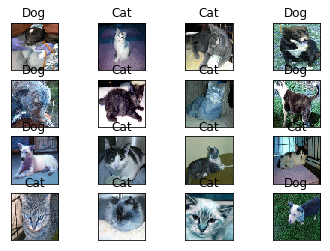

In [164]:
#Look at a few examples from the test set.

fig=plt.figure()

for num,pred in enumerate(preds[:16]):
    
    y = fig.add_subplot(4,4,num+1)
    if pred >= 0.5: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(test[num])
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()

In [165]:
with open('submission_file.csv','w') as f:
    f.write('id,label\n')
            
with open('submission_file.csv','a') as f:
    for num,img in enumerate(os.listdir(TEST_DIR)):
        img_num = img.split('.')[0]
        prediction = preds[num]
        f.write('{},{}\n'.format(img_num,' '.join(map(str, prediction))))
     
